In [6]:
import os

import imageio
import itk
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import histogram

import utoolbox.utils.files as fileutils
from utoolbox.container import Raster
from utoolbox.container.layouts import Volume

#### Load image

In [7]:
source_folder = os.path.join(*["data", "membrane_seg"])
file_list = fileutils.list_files(
    source_folder,
    name_filters=[
        fileutils.ExtensionFilter('tif')
    ]
)

fid = 0
print("[{}]={}".format(fid, file_list[fid]))

image = Raster(file_list[fid], layout=Volume, spacing=(.100319, .102, .102))
print("layout={}".format(image.metadata.layout))

[0]=data/membrane_seg/sample1.tif
layout=<class 'utoolbox.container.layouts.Volume'>


#### Speed function 1/(x+1)

In [8]:
speed_func = 1 / (image+1)

#### Find threshold

In [9]:
data = speed_func.copy().ravel()

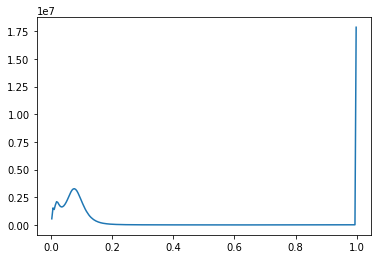

In [10]:
hist = histogram(data)
plt.plot(hist[1], hist[0])

Cut foreground/background using global average

In [11]:
t = np.mean(data)
data = data[data < t]

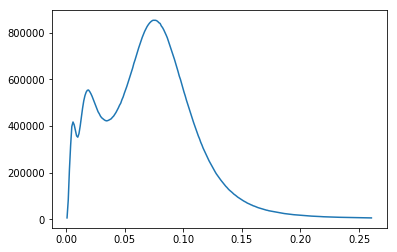

In [12]:
hist = histogram(data)
plt.plot(hist[1], hist[0])